# Code for project 2 FYS-STK 4455



This notebook contains all the code used to answer the questions and plots neccesarry for project 2


In [85]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from random import random
np.random.seed(10)
from sklearn.model_selection import train_test_split
from matplotlib import cm
import sklearn.metrics as metric
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

In [86]:
def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    
    return term1 + term2 + term3 + term4 

def create_x(x,y,n):
 
    L = len(x)
    X = np.ones((L, int((n + 1) * (n + 2) / 2)))

    for i in range(n + 1):
        t = int((i) * (i + 1) / 2)
        for j in range(i + 1):
            X[:, t + j] = x ** (i - j) * y ** j

    return X

def MSE(y, y_tilde):
    return np.mean((y - y_tilde) ** 2)


def R2(y, y_tilde):
    return 1 - np.sum((y - y_tilde) ** 2) / np.sum((y - np.mean(y)) ** 2)



def OLS(XTrain, XTest, yTrain, yTest):
    Beta_OLS_optimal = np.linalg.pinv(XTrain.T @ XTrain) @ XTrain.T @ yTrain

    ytildeTrain = XTrain @ Beta_OLS_optimal
    ytildeTest = XTest @ Beta_OLS_optimal

    return ytildeTest, ytildeTrain, Beta_OLS_optimal

def Ridge(XTrain, XTest, yTrain, yTest,lamb,validate_testsize=0.2):
    Beta_Ridge = np.zeros((len(lamb),XTrain.shape[1])); MSE_lamb = np.zeros(len(lamb))

    XTraining, XValidate, yTraining, yValidate = train_test_split(XTrain,yTrain,test_size=validate_testsize)

    for i,lambval in enumerate(lamb):
        Beta_Ridge[i,:] = np.linalg.pinv(XTraining.T @ XTraining + lambval * np.identity((XTraining.T @ XTraining).shape[0])) @ XTraining.T @ yTraining
        ytildeValidate = XValidate @ Beta_Ridge[i]

        MSE_lamb[i] = MSE(yValidate,ytildeValidate)

    optimalLambda = lamb[np.argmin(MSE_lamb)]
    Beta_Ridge_Optimal = Beta_Ridge[np.argmin(MSE_lamb)]

    ytildeTrain = XTrain @ Beta_Ridge_Optimal
    ytildeTest = XTest @ Beta_Ridge_Optimal
    
    return ytildeTest, ytildeTrain, Beta_Ridge_Optimal

def scale(xtrain, xtest):
    scaler = StandardScaler()
    scaler.fit(xtrain)
    xtrain_scaled = scaler.transform(xtrain); xtrain_scaled[:,0] = 1
    xtest_scaled = scaler.transform(xtest); xtest_scaled[:,0] = 1

    return xtrain_scaled, xtest_scaled

def learning_schedule(t,t0=5,t1=50):
    return t0/(t+t1)

def SGD_OLS(X,y,n,M,epochs,lamb=0,gamma=0,classes=2):

    m = int(n/M)
    
    theta = np.random.randn(X.shape[1]) 
    for epoch in range(epochs):
        for j in range(m):
            k = np.random.randint(n-M) 
            X_k = X[k:k+M]
            y_k = y[k:k+M]
            gradient = (2/n)*X_k.T@((X_k@theta)-y_k)
            gamma = learning_schedule(epoch * m + j)
            theta = theta - gamma * gradient
    return theta

# Adding momentum

def SGD_OLS_momentum(X,y,n,M,epochs,lamb=0,gamma=0,classes=2, momentum=0.2):

    m = int(n/M)
    
    theta = np.random.randn(X.shape[1]) 
    
    change = 0
    
    for epoch in range(epochs):
        for j in range(m):
            k = np.random.randint(n-M) 
            X_k = X[k:k+M]
            y_k = y[k:k+M]
            gradient = (2/n)*X_k.T@((X_k@theta)-y_k)
            gamma = learning_schedule(epoch * m + j)
            change_updated = gamma * gradient + momentum * change
            theta = theta - change_updated
            change = change_updated
            
    return theta


def SGD_Ridge(X,y,n,M,epochs,lamb=0,gamma=0,classes=2):
    theta = np.random.randn(X.shape[1])
    for epoch in range(epochs):
        for j in range(m):
            k = np.random.randint(n-M)
            X_k = X[k:k+M]
            y_k = y[k:k+M]
            gradient = (2/n)*X_k.T@((X_k@theta)-y_k) + 2*lamb*theta
            theta = theta - gamma * gradient
    return theta

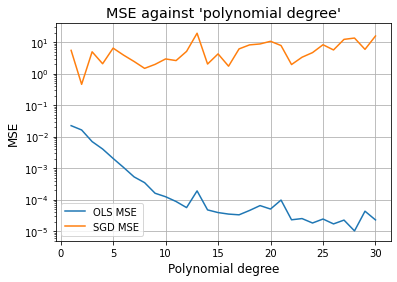

In [84]:
##Part A


n_poly = 30
MSE_OLS_array = np.zeros(n_poly)
MSE_SGD_array = np.zeros(n_poly)
R2_OLS_array = np.zeros(n_poly)
R2_SGD_array = np.zeros(n_poly)
polydegs = np.arange(1,n_poly+1)

for polydeg in polydegs:
    N = 1000 
    M = 2 
    epochs = 500

    x = np.random.rand(N) 
    y = np.random.rand(N) 

    X = create_x(x,y,polydeg) 

    z = FrankeFunction(x,y) 

    X_train, X_test, zTrain, zTest = train_test_split(X,z,test_size=0.2) 
    X_train, X_test = scale(X_train, X_test) 
    z_tilde_test, z_tilde_train, theta_ols = OLS(X_train, X_test, zTrain, zTest)

    theta_SGD = SGD_OLS(X_train,zTrain,N,M,epochs)
    MSE_OLS = MSE(zTest,z_tilde_test)
    MSE_SGD = MSE(zTest,X_test@theta_SGD)
    R2_OLS = R2(zTest,z_tilde_test)
    R2_SGD = R2(zTest, X_test@theta_SGD)
   
    MSE_OLS_array[polydeg-1] = MSE_OLS
    MSE_SGD_array[polydeg-1] = MSE_SGD
    #R2_OLS_array[polydeg-1] = R2_OLS
    #R2_SGD_array[polydeg-1] = R2_SGD

plt.plot(polydegs,MSE_OLS_array,label="OLS MSE")
plt.plot(polydegs,MSE_SGD_array,label="SGD MSE")
#plt.plot(polydegs,R2_OLS_array,label="OLS R2")
#plt.plot(polydegs,R2_SGD_array,label="SGD R2")

plt.grid(); plt.legend(); plt.semilogy()
plt.xlabel("Polynomial degree",fontsize="large")
plt.ylabel("MSE",fontsize="large")
plt.title("MSE against 'polynomial degree'",fontsize="x-large")
plt.show()

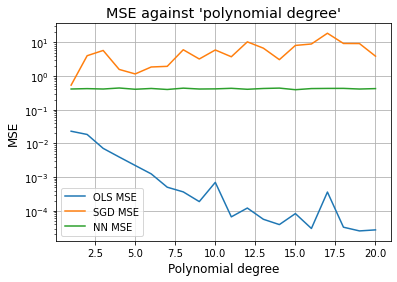

In [116]:
#Part B: 

class NeuralNetwork(object):
    # Skrevet ved hjelp av https://www.youtube.com/watch?v=UJwK6jAStmg&list=PLiaHhY2iBX9hdHaRr6b7XevZtgZRa1PoU&index=2
    def __init__(self, polydeg):
        #Define HyperParameters
        inputLayerSize = [1, 3, 6, 10, 15, 21, 28, 36, 45, 55, 66, 78, 91, 105, 120,136, 153, 171, 190, 210, 231, 253, 276, 300, 325, 351, 378, 406, 435, 465, 496, 528, 561, 595, 630, 666, 703, 741, 780, 820, 861, 903, 946, 990, 1035, 1081, 1128, 1176, 1225, 1275, 1326, 1378, 1431]
        self.inputLayerSize = inputLayerSize[polydeg]
        self.outputLayerSize = polydeg
        self.hiddenLayerSize = 10
        self.hiddenLayer2Size = 10
        
        #Weights (Parameters):
        self.W1 = np.random.rand(self.inputLayerSize, self.hiddenLayerSize)
        self.W2 = np.random.rand(self.hiddenLayerSize, self.hiddenLayer2Size)
        self.W3 = np.random.rand(self.hiddenLayer2Size, self.outputLayerSize)
        
    #Moving our data through the network:
    def forward(self, X):
        #Propagate inputs through network:
        self.z2 = np.dot(X, self.W1)
        self.a2 = sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        self.a3 = sigmoid(self.z3)
        self.z4 = np.dot(self.a3, self.W3)
        yHat= sigmoid(self.z4)
        return yHat

    def sigmoid(z):
        #Apply sigmoid activation function
        return 1/(1+np.exp(-z))

n_poly = 20
MSE_OLS_array = np.zeros(n_poly)
MSE_SGD_array = np.zeros(n_poly)
MSE_NN_array = np.zeros(n_poly)

polydegs = np.arange(1,n_poly+1)

for polydeg in polydegs:
    N = 1000 
    M = 2 
    epochs = 500

    x = np.random.rand(N) 
    y = np.random.rand(N) 

    X = create_x(x,y,polydeg) 

    z = FrankeFunction(x,y) 
    
    X = create_x(x,y,polydeg)
    NN = NeuralNetwork(polydeg)        
    yHat = NN.forward(X)
    yHat = yHat.flatten()
    yHat = yHat[:1000]

    X_train, X_test, zTrain, zTest = train_test_split(X,z,test_size=0.2) 
    X_train, X_test = scale(X_train, X_test) 
    z_tilde_test, z_tilde_train, theta_ols = OLS(X_train, X_test, zTrain, zTest)

    theta_SGD = SGD_OLS(X_train,zTrain,N,M,epochs)
    MSE_OLS = MSE(zTest,z_tilde_test)
    MSE_SGD = MSE(zTest,X_test@theta_SGD)
    MSE_NN = MSE(z,yHat)
   
    MSE_OLS_array[polydeg-1] = MSE_OLS
    MSE_SGD_array[polydeg-1] = MSE_SGD
    MSE_NN_array[polydeg-1] = MSE_NN

plt.plot(polydegs,MSE_OLS_array,label="OLS MSE")
plt.plot(polydegs,MSE_SGD_array,label="SGD MSE")
plt.plot(polydegs,MSE_NN_array,label="NN MSE")

plt.grid(); plt.legend(); plt.semilogy()
plt.xlabel("Polynomial degree",fontsize="large")
plt.ylabel("MSE",fontsize="large")
plt.title("MSE against 'polynomial degree'",fontsize="x-large")
plt.show()

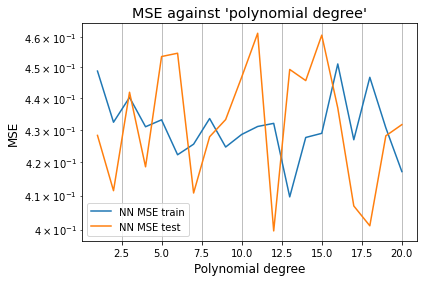

In [129]:
#Prøver å splitte mellom train og test: 

class NeuralNetwork(object):
    # Skrevet ved hjelp av https://www.youtube.com/watch?v=UJwK6jAStmg&list=PLiaHhY2iBX9hdHaRr6b7XevZtgZRa1PoU&index=2
    def __init__(self, polydeg):
        #Define HyperParameters
        inputLayerSize = [1, 3, 6, 10, 15, 21, 28, 36, 45, 55, 66, 78, 91, 105, 120,136, 153, 171, 190, 210, 231, 253, 276, 300, 325, 351, 378, 406, 435, 465, 496, 528, 561, 595, 630, 666, 703, 741, 780, 820, 861, 903, 946, 990, 1035, 1081, 1128, 1176, 1225, 1275, 1326, 1378, 1431]
        self.inputLayerSize = inputLayerSize[polydeg]
        self.outputLayerSize = polydeg
        self.hiddenLayerSize = 10
        self.hiddenLayer2Size = 10
        
        #Weights (Parameters):
        self.W1 = np.random.rand(self.inputLayerSize, self.hiddenLayerSize)
        self.W2 = np.random.rand(self.hiddenLayerSize, self.hiddenLayer2Size)
        self.W3 = np.random.rand(self.hiddenLayer2Size, self.outputLayerSize)
        
    #Moving our data through the network:
    def forward(self, X):
        #Propagate inputs through network:
        self.z2 = np.dot(X, self.W1)
        self.a2 = sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        self.a3 = sigmoid(self.z3)
        self.z4 = np.dot(self.a3, self.W3)
        yHat= sigmoid(self.z4)
        return yHat

    def sigmoid(z):
        #Apply sigmoid activation function
        return 1/(1+np.exp(-z))

n_poly = 20
MSE_OLS_array_train = np.zeros(n_poly)
MSE_OLS_array_test = np.zeros(n_poly)
MSE_SGD_array_train = np.zeros(n_poly)
MSE_SGD_array_test = np.zeros(n_poly)

MSE_NN_array = np.zeros(n_poly)
MSE_NN_array_train = np.zeros(n_poly)
MSE_NN_array_test = np.zeros(n_poly)

polydegs = np.arange(1,n_poly+1)

for polydeg in polydegs:
    N = 1000 
    M = 2 
    epochs = 500

    x = np.random.rand(N) 
    y = np.random.rand(N) 

    X = create_x(x,y,polydeg) 

    z = FrankeFunction(x,y) 
    
    X = create_x(x,y,polydeg)
    NN = NeuralNetwork(polydeg)        
    yHat = NN.forward(X)
    yHat = yHat.flatten()
    yHat = yHat[:1000]

    X_train, X_test, zTrain, zTest = train_test_split(X,z,test_size=0.2) 
    X_train, X_test = scale(X_train, X_test) 
    z_tilde_test, z_tilde_train, theta_ols = OLS(X_train, X_test, zTrain, zTest)
    theta_SGD = SGD_OLS(X_train,zTrain,N,M,epochs)
    
    
    MSE_OLS_train = MSE(zTrain,z_tilde_train)
    MSE_OLS_test = MSE(zTest,z_tilde_test)
    MSE_SGD_train = MSE(zTrain,X_train@theta_SGD)
    MSE_SGD_test = MSE(zTest,X_test@theta_SGD)
    yHat_train, yHat_test = train_test_split(yHat, test_size = 0.2)
    MSE_NN_train = MSE(zTrain,yHat_train)
    MSE_NN_test = MSE(zTest,yHat_test)
   
    MSE_OLS_array_train[polydeg-1] = MSE_OLS_train
    MSE_OLS_array_test[polydeg-1] = MSE_OLS_test
    MSE_SGD_array_train[polydeg-1] = MSE_SGD_train
    MSE_SGD_array_test[polydeg-1] = MSE_SGD_test
    
    MSE_NN_array[polydeg-1] = MSE_NN
    MSE_NN_array_train[polydeg-1] = MSE_NN_train
    MSE_NN_array_test[polydeg-1] = MSE_NN_test
    

#plt.plot(polydegs,MSE_OLS_array_train,label="OLS MSE train")
#plt.plot(polydegs,MSE_SGD_array_train,label="SGD MSE train")
plt.plot(polydegs,MSE_NN_array_train,label="NN MSE train")

#plt.plot(polydegs,MSE_OLS_array_test,label="OLS MSE test")
#plt.plot(polydegs,MSE_SGD_array_test,label="SGD MSE test")
plt.plot(polydegs,MSE_NN_array_test,label="NN MSE test")

plt.grid(); plt.legend(); plt.semilogy()
plt.xlabel("Polynomial degree",fontsize="large")
plt.ylabel("MSE",fontsize="large")
plt.title("MSE against 'polynomial degree'",fontsize="x-large")
plt.show()

In [ ]:
# Varying number of nodes